<h1>Small Image Classification Using Simple Aritifical Neural Network</h1>

In [100]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
# Version Information
# tensorflow 2.2.0 , Cudnn7.6.5 and Cuda 10.1 , python 3.8

In [101]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [102]:
tf.__version__

'2.9.1'

In [103]:
tf.test.is_built_with_cuda()

True

In [104]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [105]:
X_train.shape

(50000, 32, 32, 3)

In [106]:
y_train.shape

(50000, 1)

In [107]:
y_train[3]

array([4], dtype=uint8)

<h4 >Data Visualization</h4>

In [108]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

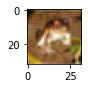

In [109]:
plot_sample(0)

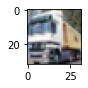

In [110]:
plot_sample(1)

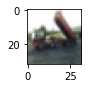

In [111]:
plot_sample(2)

In [112]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

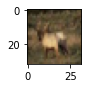

In [113]:
plot_sample(3)

In [114]:
classes[y_train[3][0]]

'deer'

In [115]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [116]:
y_test.shape

(10000, 1)

In [117]:
X_train.shape

(50000, 32, 32, 3)

<h4 style="color:purple">Preprocessing: Scale images</h4>

In [118]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [119]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [120]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [121]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

<h4 >Model building and training</h4>

In [122]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 122s 77ms/step - loss: 1.8106 - accuracy: 0.3558


<h4>Let's make some predictions</h4>

In [123]:
y_predicted = model.predict(X_test_scaled)

313/313 [==============================] - 7s 22ms/step


In [124]:
y_predicted[0]

array([0.39788517, 0.71509135, 0.6508603 , 0.7668082 , 0.26279786,
       0.67444223, 0.80170906, 0.07824286, 0.62852955, 0.19535732],
      dtype=float32)

313/313 [==============================] - 7s 23ms/step


Text(69.0, 0.5, 'Truth')

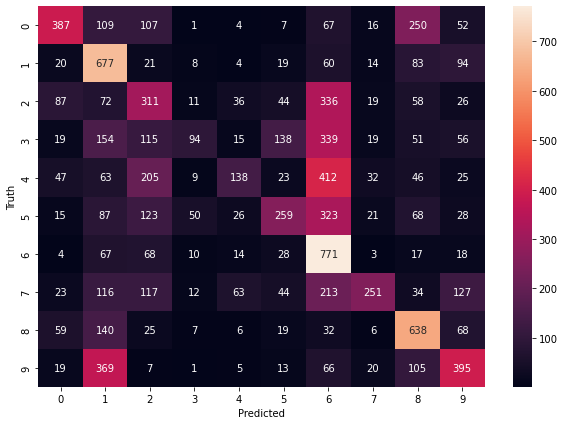

In [125]:
y_predicted = model.predict(X_test_scaled)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [126]:
y_test[0]

array([3], dtype=uint8)